<a href="https://colab.research.google.com/github/songdh1104/AIPYTHON/blob/main/20250516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

df = pd.read_csv('/example_data.csv')

# 기본 정보
df.info()

# 기초 통계량
print(df.describe())

# 결측치 개수
print(df.isnull().sum())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [12]:
# 이상치 확인 (score > 100 or study_time > 10)
# 이상치(점수 > 100 또는 공부시간 > 10) 확인
outliers = df[(df['점수'] > 100) | (df['공부시간'] > 10)]
print(outliers)

    학번    이름   학년   점수 분반  공부시간
2    3   강감찬  4.0   91  C    20
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
18  19   이순신  1.0  200  A     3


In [13]:
# 중복 행 개수 확인
print(df.duplicated().sum())

1


In [14]:
# 중복 제거된 데이터프레임
df_cleaned = df.drop_duplicates()
print(df_cleaned)

    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

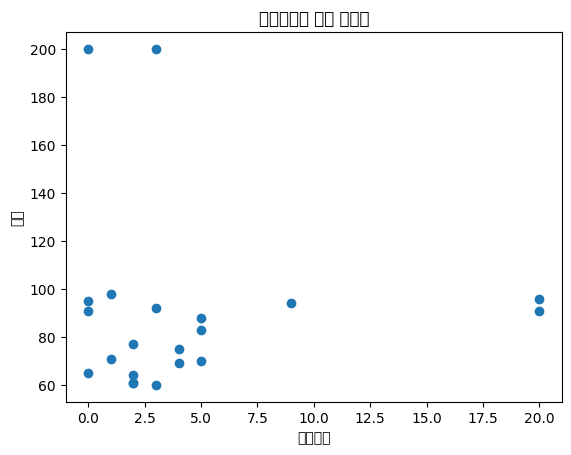

In [15]:
# 산점도 그리기
plt.figure()
plt.scatter(df['공부시간'], df['점수'])
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.title('공부시간과 점수 산점도')
plt.show()

In [7]:
# 이상치 처리 (IQR 방법)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_clean = remove_outliers_iqr(df, '점수')
df_clean = remove_outliers_iqr(df_clean, '공부시간')
display()

In [8]:
# '분반'별 평균 점수 계산
group_means = df_clean.groupby('분반')['점수'].mean().reset_index()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

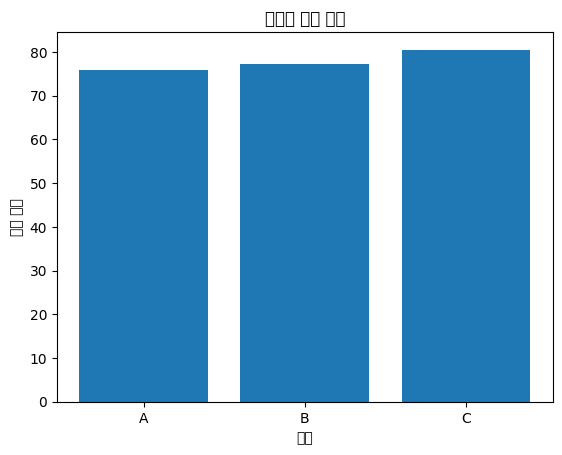

In [9]:
# 막대 그래프: 분반별 평균 점수
plt.figure()
plt.bar(group_means['분반'], group_means['점수'])
plt.xlabel('분반')
plt.ylabel('평균 점수')
plt.title('분반별 평균 점수')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

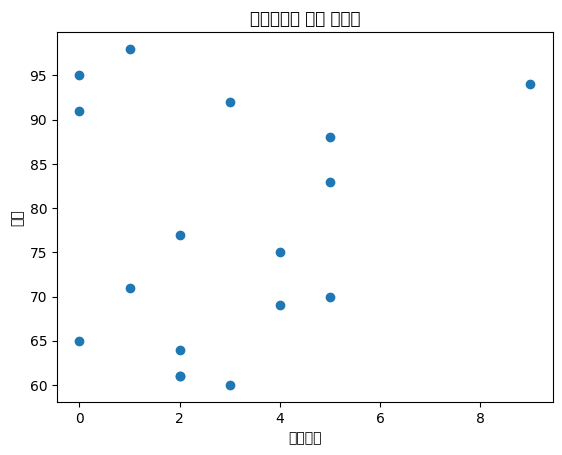

In [10]:
# 산점도: 공부시간과 점수
plt.figure()
plt.scatter(df_clean['공부시간'], df_clean['점수'])
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.title('공부시간과 점수 산점도')
plt.show()